In [80]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import json
import cv2

In [81]:
DATA_PATH = Path("/data/wr153")

In [82]:
for f in DATA_PATH.joinpath("text").iterdir():
    if f.suffix == ".json":
        with open(f, "rb") as fp:
            d = json.load(fp)
            # print(sorted(d)[0])
            ch_title = d.pop(sorted(d)[0])
            # print(sorted(d)[0])
            print(d.keys())
            print(ch_title)
            break

dict_keys(['page_170', 'page_172', 'page_171', 'page_174', 'page_166', 'page_175', 'page_173', 'page_169', 'page_176', 'page_167', 'page_168'])
THE DOWRY


# Features
* average number of words per page in each chapter
* average number of panels per page in each chapter
* distribution of sentiment in overall memoir
    * positive, negative, neutral
* word cloud of ideas presented
* ratio of images to words in each chapter
* colors used in memoir

In [110]:
img = cv2.imread(str(DATA_PATH.joinpath("images", "chapter_24", "page_223.jpg")))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours
min_area = 1000
contours = [c for c in contours if cv2.contourArea(c) > min_area]

# Count the remaining contours
num_panels = len(contours)

Text(0.5, 1.0, 'Panels Detected Image')

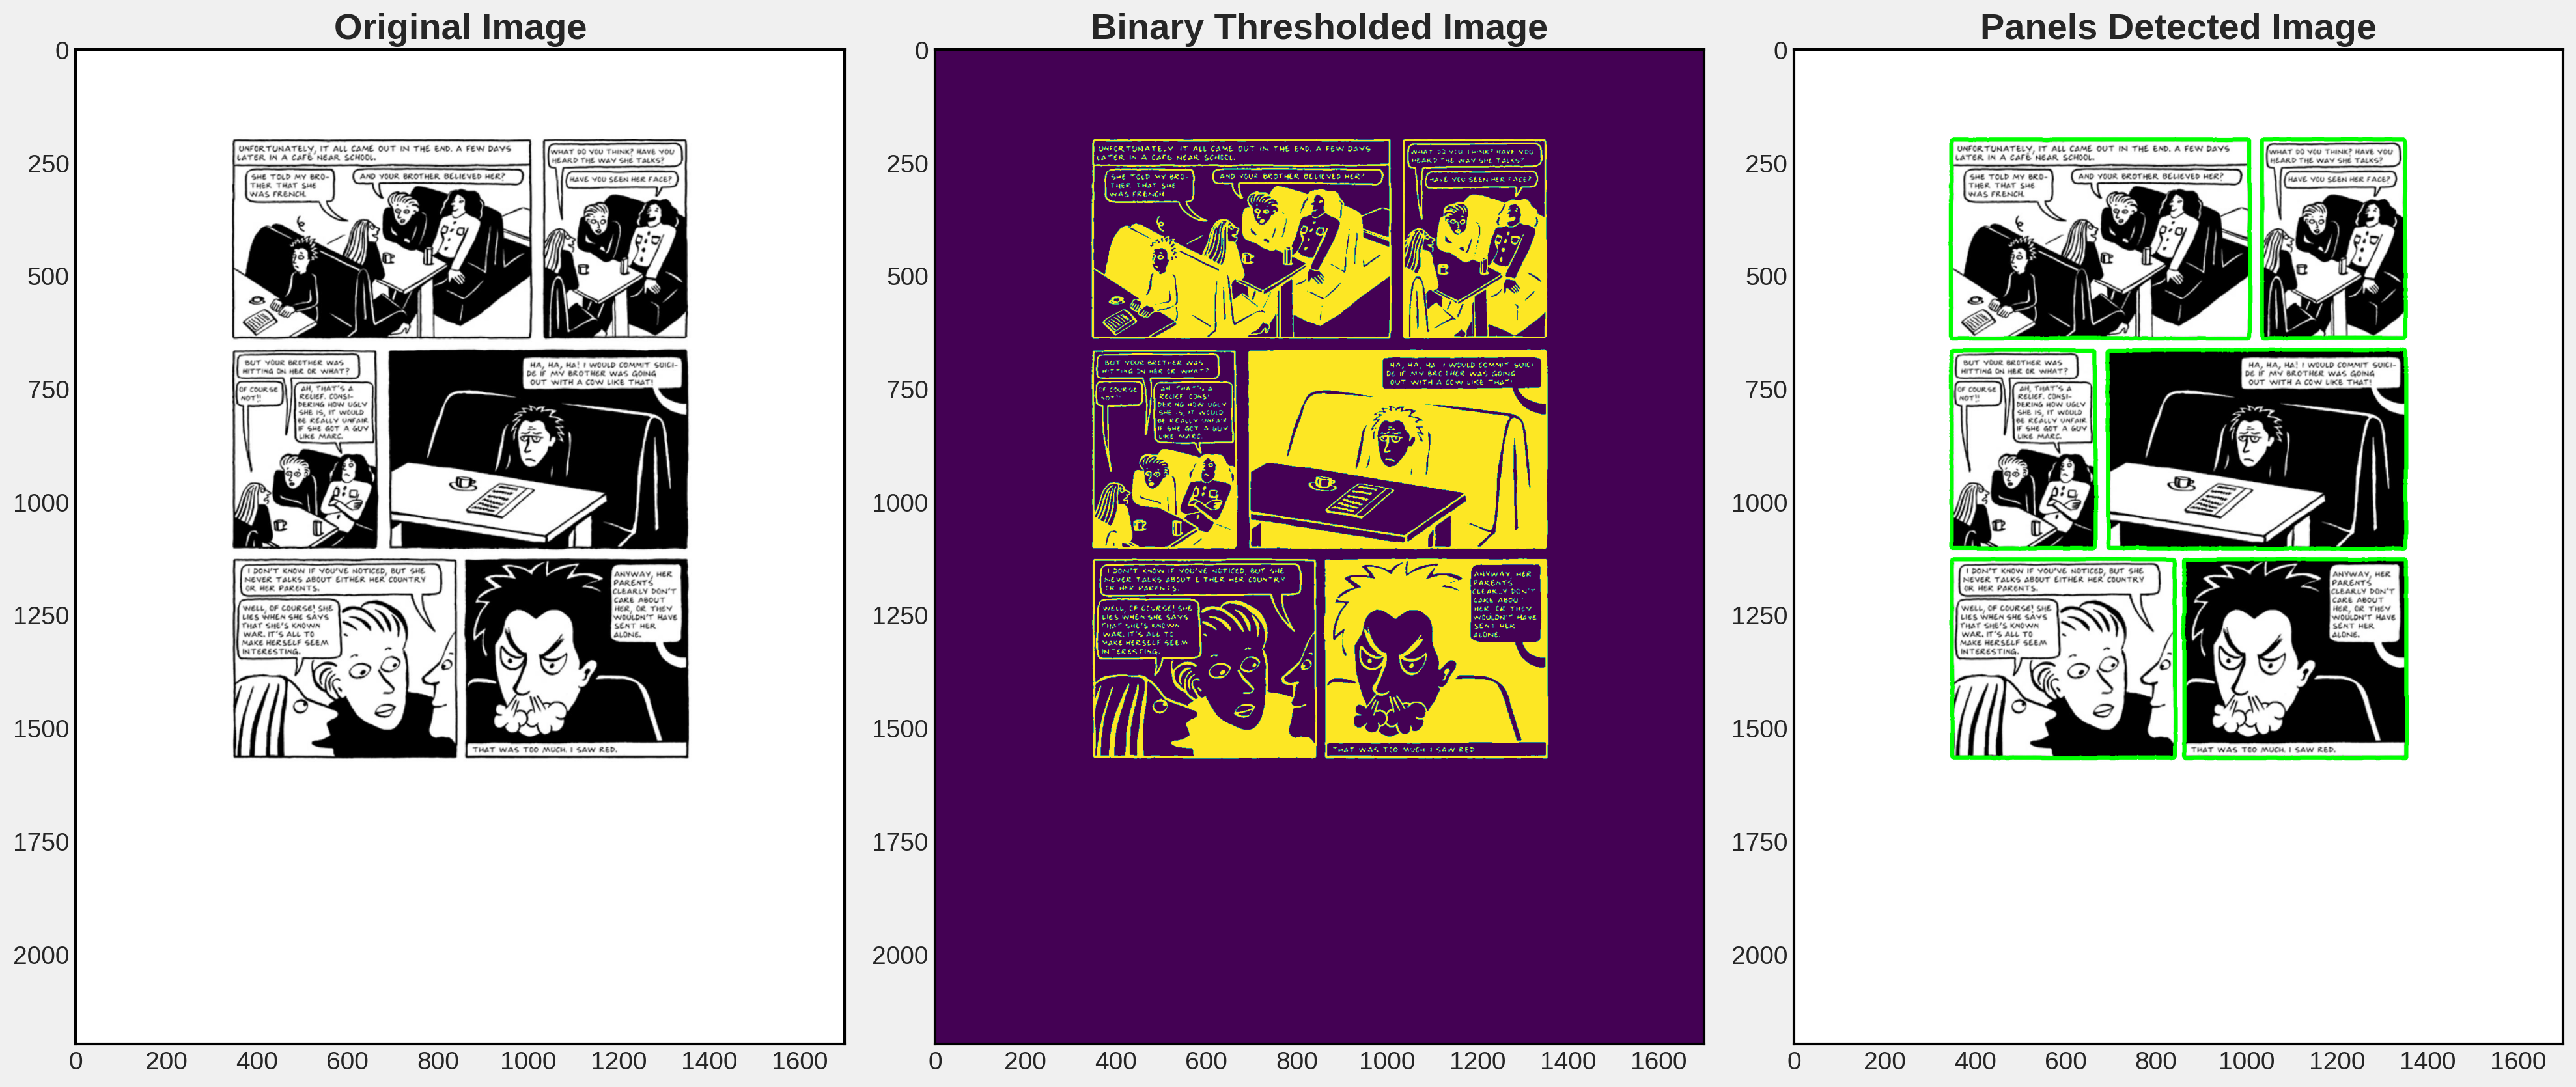

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(img)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(thresh)
axs[1].grid(False)
axs[1].set_title("Binary Thresholded Image")
axs[2].imshow(cv2.drawContours(img, contours, -1, (0, 255, 0), 8))
axs[2].grid(False)
axs[2].set_title("Panels Detected Image")
